In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import ast
import os
import sys
import pymc as pm

In [2]:
# Plotting settings
plt.style.use('ggplot')
fig_width = 25  # figure width in cm
inches_per_cm = 0.393701               # Convert cm to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width*inches_per_cm  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
label_size = 14
tick_size = 12
params = {'backend': 'ps',
          'lines.linewidth': 1.5,
          'axes.labelsize': label_size,
          'axes.titlesize': label_size,
          'font.size': label_size,
          'legend.fontsize': tick_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': False,
          'figure.figsize': fig_size,
          "font.weight": "bold",
          "axes.labelweight": "bold"}
plt.rcParams.update(params)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [w1, w2]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 28 seconds.
There were 1171 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


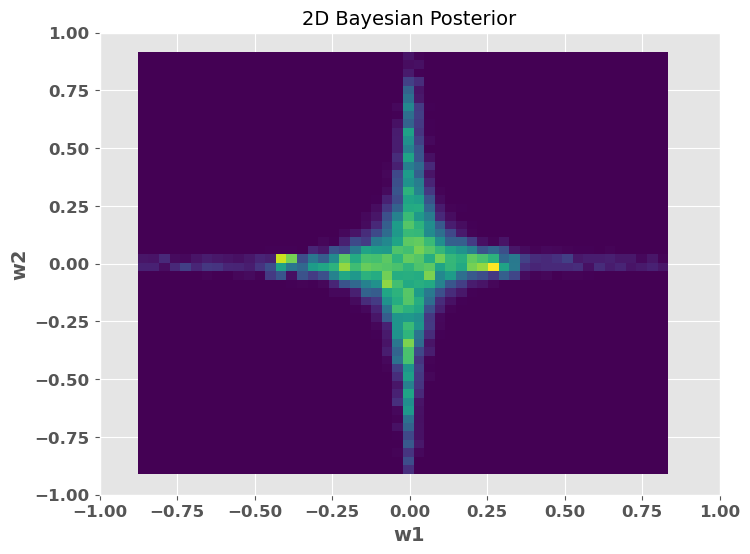

In [28]:
# Linear regression 
%matplotlib inline

def generate_data(n_samples=1000):
    x = np.random.normal(0, 1, n_samples)
    y = np.random.normal(0, 1, n_samples)
    return x, y

# Set up the problem
n_samples = 10000
# Generate synthetic data
x, y = generate_data(n_samples=n_samples)

wmax = 1

# Define the model using PyMC3
with pm.Model() as pmModel:
    # Prior distribution for w
    w1 = pm.Uniform('w1', lower=-wmax, upper=wmax)
    w2 = pm.Uniform('w2', lower=-wmax, upper=wmax)
    ll = w1 * w2 * x

    # Likelihood function
    likelihood = pm.Normal('likelihood', mu= ll, sigma=1, observed=y)
    
    # Perform MCMC sampling
    trace = pm.sample(5000, tune=5000, cores=1, chains=4, random_seed=42)

# Extract the sampled values of w1 and w2
w1_samples = trace.posterior['w1'].values.flatten()
w2_samples = trace.posterior['w2'].values.flatten()
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
hist, xedges, yedges, _ = ax.hist2d(w1_samples, w2_samples, bins=50, density=True, cmap='viridis')
ax.set_xlim((-wmax, wmax))
ax.set_ylim((-wmax, wmax))
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_title('2D Bayesian Posterior')
plt.show()